SVR(gamma=0.5, kernel='poly')

Mean Squared Error (MSE): 11.260606764244104
R-squared (R²): -45.78479715732621


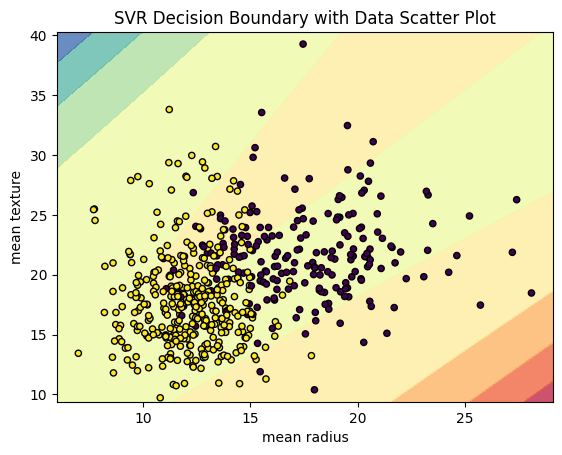

In [ ]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]  # Using only the first two features for visualization
y = cancer.target

# Build the model
# Using polynomial kernel for SVR
svr = SVR(kernel="poly", gamma=0.5, C=1.0)

print(svr)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Train the model
svr.fit(X_train, y_train)

# Predict the model
y_pred = svr.predict(X_test)
#print(y_pred)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
    svr,
    X_train,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title("SVR Decision Boundary with Data Scatter Plot")
plt.show()
